In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [2]:
# Get the dataset
imdb,info = tfds.load('imdb_reviews/subwords8k',with_info = True, as_supervised = True)

In [3]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\gopal\\tensorflow_datasets\\imdb_reviews\\subwords8k\\1.0.0',
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    splits={
   

In [4]:
# Pre_Generated Tokenizer
tokenizer = info.features['text'].encoder

In [5]:
sub_words = tokenizer.subwords

In [6]:
# Sample string encoding
sample = "Hello there! How are you doing?"
sample_encoded = tokenizer.encode(sample)
print(sample_encoded)
sample_decoded = tokenizer.decode(sample_encoded)
print(sample_decoded)

[4025, 222, 224, 90, 693, 29, 37, 7554, 269, 7992]
Hello there! How are you doing?


In [7]:
# Let's see what all these numbers correspond to
for nums in sample_encoded:
    print(f'{nums} : {tokenizer.decode([nums])}')

4025 : Hell
222 : o 
224 : there
90 : ! 
693 : How 
29 : are 
37 : you 
7554 : doi
269 : ng
7992 : ?


We can see it isn't making very sense. Like doi . Also Hell instead of hello changed the complete meaning

In [8]:
train , test =imdb['train'],imdb['test']
print(train)

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>


In [9]:
# Shuffle the data
train_dataset = train.shuffle(10000)
# Pad the data and make batches, our data is in tensor

BATCH_SIZE = 64

train_dataset = train_dataset.padded_batch(BATCH_SIZE,tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test.padded_batch(BATCH_SIZE,tf.compat.v1.data.get_output_shapes(test))

In [10]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [12]:
history = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 16s 41ms/step - loss: 0.6849 - accuracy: 0.5588 - val_loss: 0.6560 - val_accuracy: 0.5933
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 0.5832 - accuracy: 0.7514 - val_loss: 0.5234 - val_accuracy: 0.7940
Epoch 3/10
391/391 [==============================] - 16s 42ms/step - loss: 0.4513 - accuracy: 0.8575 - val_loss: 0.4360 - val_accuracy: 0.8637
Epoch 4/10
391/391 [==============================] - 15s 40ms/step - loss: 0.3664 - accuracy: 0.8908 - val_loss: 0.3781 - val_accuracy: 0.8718
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 0.3125 - accuracy: 0.9070 - val_loss: 0.3501 - val_accuracy: 0.8772
Epoch 6/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2713 - accuracy: 0.9173 - val_loss: 0.3243 - val_accuracy: 0.8762
Epoch 7/10
391/391 [==============================] - 15s 39ms/step - loss: 0.2192 - accuracy: 0.9255 - val_loss: 0.3074 - val_accuracy:

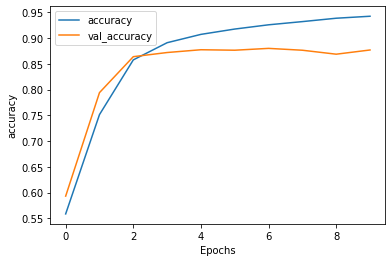

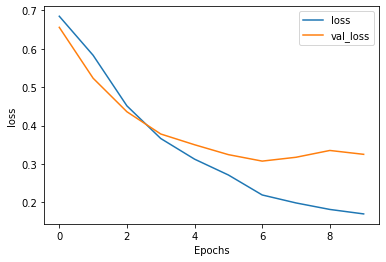

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs1.tsv', 'w', encoding='utf-8')
out_m = io.open('meta1.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)
